<a href="https://colab.research.google.com/github/aleks-haksly/pandas/blob/main/window%20functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Имеется следующий [набор данных](https://github.com/aleks-haksly/pandas/blob/main/Datasets/avocado_full.csv) от Hass Avocado Board :

* Date — дата
* AveragePrice — средняя цена одного авокадо
* Total Volume — количество проданных авокадо
* 4046 — количество проданных авокадо PLU* 4046
* 4225 — количество проданных авокадо PLU 4225
* 4770 — количество проданных авокадо PLU 4770
* Total Bags — всего упаковок
* Small Bags — маленькие упаковки
* Large Bags — большие
* XLarge Bags — очень большие
* type — обычный или органический
* year — год
* Region — город или регион the city or region of the observation
* *PLU — код товара (Product Lookup code)

#### 1. Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным [2, 4, 10, 50], постройте графики.

Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Загрузим df и аггрегируем по дням
avocado_mean = pd.read_csv("https://raw.githubusercontent.com/aleks-haksly/pandas/main/Datasets/avocado_full.csv",
                           index_col=0, parse_dates=['Date'])['AveragePrice'].groupby(by='Date').mean().to_frame()

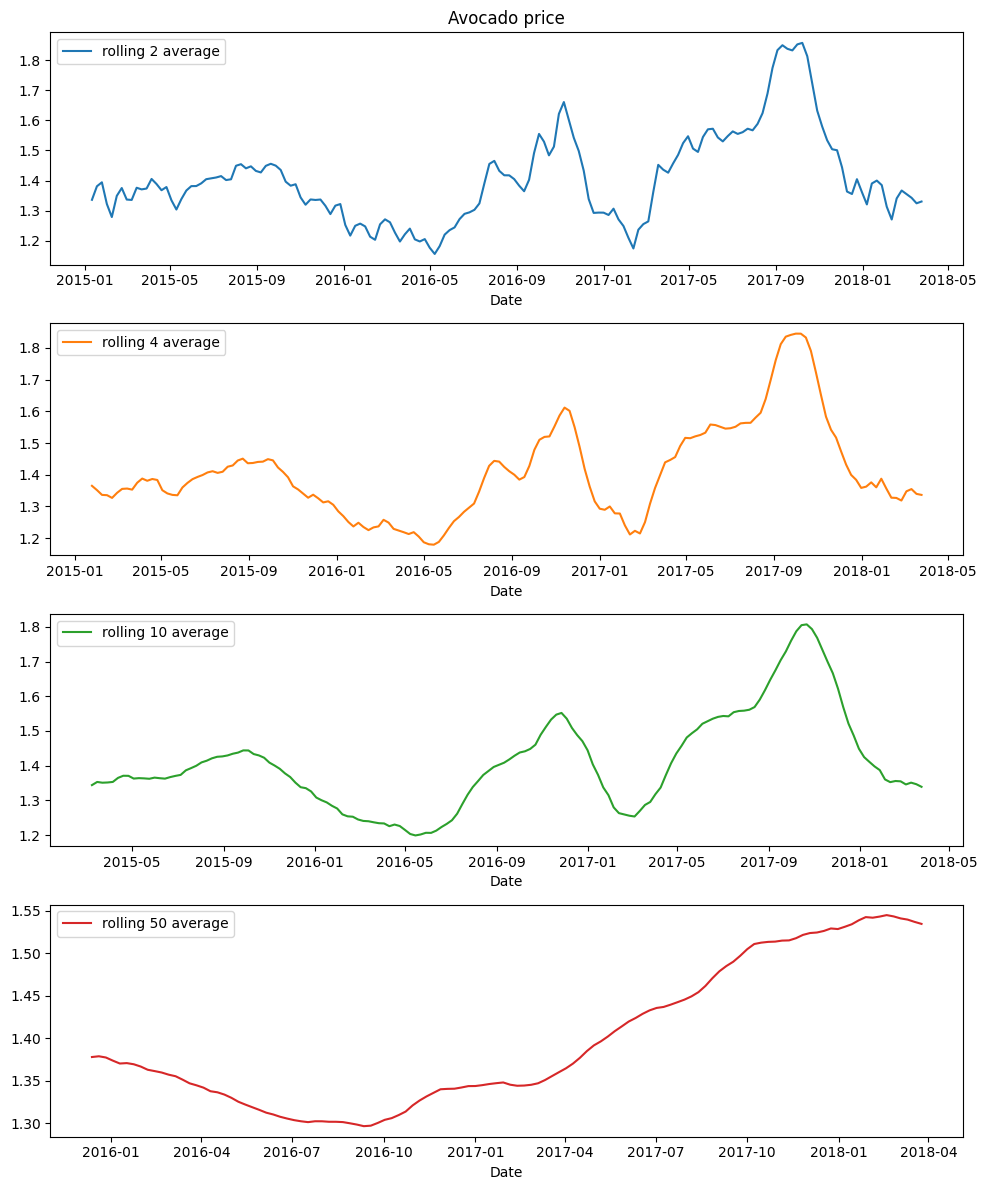

In [63]:
# Построим графики для всех интересующих нас окон
windows = [2, 4, 10, 50]
fig, axes = plt.subplots(nrows=len(windows), figsize=(10, 3 * len(windows)))
for i, w in enumerate(windows):
  sns.lineplot(avocado_mean.rolling(window=w).mean(), ax=axes[i], palette=sns.color_palette(sns.color_palette()[i:]))
  axes[i].legend(loc='upper left', labels=[f'rolling {w} average'])
axes[0].set_title('Avocado price')
fig.tight_layout()